# Scraping Understat Using For Loops


**By Jose Gonzalez**
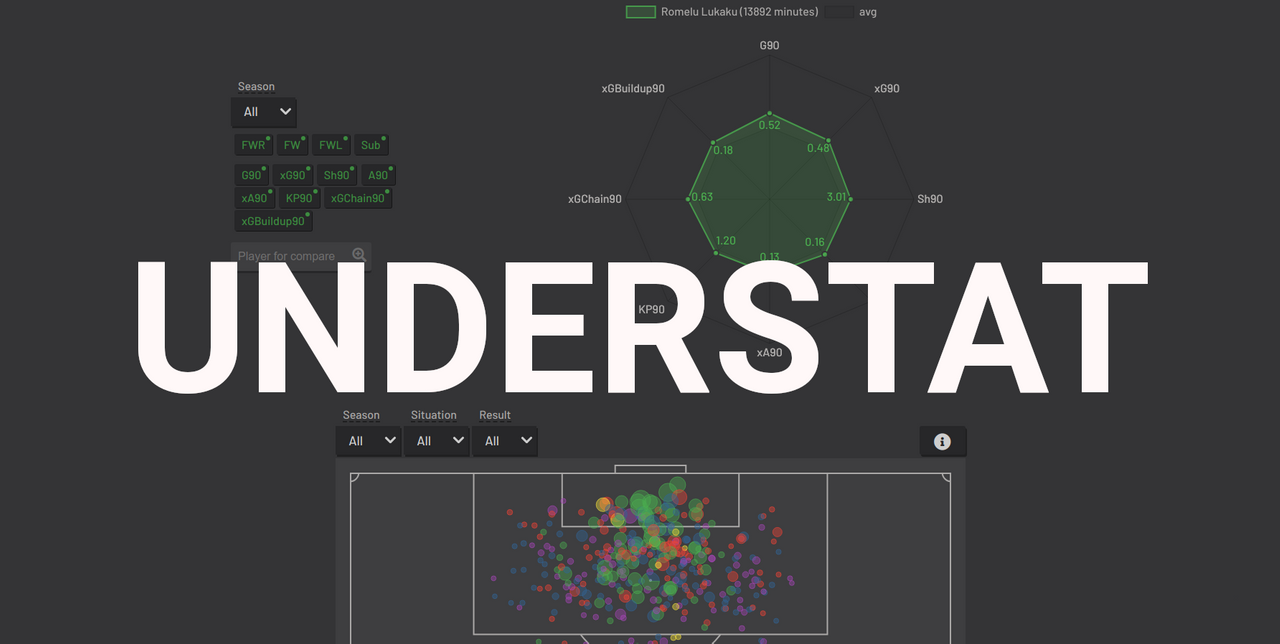


<a id="1."></a>
# 1. Introduction

Continuing the other scraping notebooks [Selenium] , [BS4] and [Understat module] We proceed by scraping not only a few shots for a specific player but also for all the players want, as well as all the match shots and match statistics.

<a id="2."></a>
# Notebook content

* [1. Introduction](#1.)
* [2.Notebook Content.](#2.)
* [3.Importing libraries.](#3.)
* [4.Scrape all La Liga player shots.](#4.)
    - [4.1. Beautiful Soup.](#4.1)
    - [4.2. Selenium.](#4.2)
* [5. Scrape all match shots for the EPL](#4.)
    - [5.1. Beautiful Soup.](#5.1)
    - [5.2. Selenium](#5.2)
* [6. Scraping all EPL matches](#6.)
    - [6.1. In Beautiful Soup.](#6.1)
    - [6.2. In Selenium](#6.2)
* [7. References](#7.)
* [8. Other notebooks](#8.)

<a id="3."></a>
# Importing libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from tqdm import tqdm
import numpy as np
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as sc
from selenium.webdriver.common.by import By
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import re

<a id="4."></a>
# Scrape all players shots from La Liga 

In order to scrape all shots taken by each player from la liga, we must first scrape their IDs and change their data type from obj to int and then run a loop with those values to scrape all the shots the players have taken throughout their careers.

In [2]:
# Entering the league's  link
link = "https://understat.com/league/La_liga"
res = requests.get(link)
soup = BeautifulSoup(res.content,'lxml')
scripts = soup.find_all('script')
# Get the players stats 
strings = scripts[3].string 
# Getting rid of unnecessary characters from json data
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)
# Creating the dataframe
all_shots = pd.DataFrame(data)
# Changing the data type using pd.to_numeric() function
all_shots["id"] = pd.to_numeric(all_shots["id"])
idd = all_shots["id"].values.tolist()

<a id="4.1"></a>
## Beautiful Soup
Once we've scraped all the players IDs , now we can proceed to run the loop.

In [3]:
shoots = pd.DataFrame()
for i in tqdm(idd):
    url = f"https://understat.com/player/{i}"
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    scripts = soup.find_all('script')
    strings = scripts[3].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    data = json.loads(json_data)
    shoots = shoots.append(pd.DataFrame(data))

100%|████████████████████████████████████████████████████████████████████████████████| 570/570 [09:07<00:00,  1.04it/s]


In [4]:
display(shoots)

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,32522,22,MissedShots,0.7859999847412109,0.52,0.03867039829492569,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Rafinha,Pass
1,32525,41,Goal,0.8619999694824219,0.615,0.06870150566101074,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Sergio Busquets,BallRecovery
2,32529,62,Goal,0.86,0.435,0.15034306049346924,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,None,TakeOn
3,32769,3,SavedShot,0.8180000305175781,0.38,0.045503295958042145,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Pedro,Pass
4,32773,27,SavedShot,0.8690000152587891,0.19200000762939454,0.06531666964292526,Lionel Messi,a,2097,DirectFreekick,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,416924,77,MissedShots,0.9319999694824219,0.6179999923706054,0.018616581335663795,José Boacho,a,9457,OpenPlay,2020,Head,15080,Barcelona,Getafe,5,2,2021-04-22 20:00:00,Juan Iglesias,Aerial
0,418394,33,BlockedShot,0.7319999694824219,0.5690000152587891,0.011849328875541687,Alejandro Cantero,a,9496,SetPiece,2020,LeftFoot,15113,Celta Vigo,Levante,2,0,2021-04-30 19:00:00,None,None
1,418395,36,MissedShots,0.8619999694824219,0.6890000152587891,0.07799816876649857,Alejandro Cantero,a,9496,OpenPlay,2020,RightFoot,15113,Celta Vigo,Levante,2,0,2021-04-30 19:00:00,Rúben Vezo,TakeOn
2,422639,27,MissedShots,0.9119999694824219,0.6480000305175782,0.3524963855743408,Alejandro Cantero,a,9496,OpenPlay,2020,LeftFoot,15143,Getafe,Levante,2,1,2021-05-16 16:30:00,Morales,Throughball


<a id="4.2"></a>
## In Selenium
The same exact process can be applied for Selenium.

**IMPORTANT NOTE: Remember that it's not possible to run Selenium and the chromedriver here on Kaggle which is why this cell's not been run**

In [5]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the link using get fucntion
sho = pd.DataFrame()
for i in tqdm(idd):
    link = f"https://understat.com/player/{i}"
    driver.get(link)
    # select the shot data 
    shots = driver.execute_script('return shotsData;')
    # close the driver 
    sho = sho.append(pd.DataFrame(shots))
    
driver.close()

100%|████████████████████████████████████████████████████████████████████████████████| 570/570 [08:13<00:00,  1.16it/s]


In [6]:
sho

,X,Y,a_goals,a_team,date,h_a,h_goals,h_team,id,lastAction,match_id,minute,player,player_assisted,player_id,result,season,shotType,situation,xG
0,0.7859999847412109,0.52,0,Elche,2014-08-24 20:00:00,h,3,Barcelona,32522,Pass,5831,22,Lionel Messi,Rafinha,2097,MissedShots,2014,LeftFoot,OpenPlay,0.03867039829492569
1,0.8619999694824219,0.615,0,Elche,2014-08-24 20:00:00,h,3,Barcelona,32525,BallRecovery,5831,41,Lionel Messi,Sergio Busquets,2097,Goal,2014,LeftFoot,OpenPlay,0.06870150566101074
2,0.86,0.435,0,Elche,2014-08-24 20:00:00,h,3,Barcelona,32529,TakeOn,5831,62,Lionel Messi,None,2097,Goal,2014,LeftFoot,OpenPlay,0.15034306049346924
3,0.8180000305175781,0.38,1,Barcelona,2014-08-31 18:00:00,a,0,Villarreal,32769,Pass,5842,3,Lionel Messi,Pedro,2097,SavedShot,2014,LeftFoot,OpenPlay,0.045503295958042145
4,0.8690000152587891,0.19200000762939454,1,Barcelona,2014-08-31 18:00:00,a,0,Villarreal,32773,Standard,5842,27,Lionel Messi,None,2097,SavedShot,2014,LeftFoot,DirectFreekick,0.06531666964292526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.9319999694824219,0.6179999923706054,2,Getafe,2021-04-22 20:00:00,a,5,Barcelona,416924,Aerial,15080,77,José Boacho,Juan Iglesias,9457,MissedShots,2020,Head,OpenPlay,0.018616581335663795
0,0.7319999694824219,0.5690000152587891,0,Levante,2021-04-30 19:00:00,a,2,Celta Vigo,418394,None,15113,33,Alejandro Cantero,None,9496,BlockedShot,2020,LeftFoot,SetPiece,0.011849328875541687
1,0.8619999694824219,0.6890000152587891,0,Levante,2021-04-30 19:00:00,a,2,Celta Vigo,418395,TakeOn,15113,36,Alejandro Cantero,Rúben Vezo,9496,MissedShots,2020,RightFoot,OpenPlay,0.07799816876649857
2,0.9119999694824219,0.6480000305175782,1,Levante,2021-05-16 16:30:00,a,2,Getafe,422639,Throughball,15143,27,Alejandro Cantero,Morales,9496,MissedShots,2020,LeftFoot,OpenPlay,0.3524963855743408


<a id="5."></a>
# Scraping all matches shots
In this section we'll focus on scraping all the shots from the matches instead of each player shots, for example if it's desirable to scrape every shot Barcelona took in 20/21 season or all the shots taken by every team .

<a id="5.1"></a>
## In Beautiful Soup 
As done in the section above, before scraping the games shots, we must first scrape the game IDs to then run a loop of those IDs.


In [7]:
game_ids = pd.DataFrame()
for year in [2020]:
    url = f'https://understat.com/league/EPL/{year}'
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    scripts = soup.find_all('script')
    strings = scripts[1].string
    ind_start = strings.index("('")+2
    ind_end = strings.index("')")
    json_data = strings[ind_start:ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')
    data = json.loads(json_data)
    game_ids = game_ids.append(pd.DataFrame(data).sort_values('datetime'))
    # Changing the data type to int32
    game_ids = game_ids.astype({'id': 'int32'})
    game_ids = game_ids.id.tolist()

Running the loop for the 2020/2021 season EPL

In [8]:
df = pd.DataFrame()
for i in tqdm(game_ids) :
    link = f"https://understat.com/match/{i}"
    res = requests.get(link)
    soup = BeautifulSoup(res.content,'lxml')
    scripts = soup.find_all('script')
    # Get the table 
    strings = scripts[1].string
    # Getting rid of unnecessary characters from json data
    ind_start = strings.index("('")+2 
    ind_end = strings.index("')") 
    json_data = strings[ind_start:ind_end] 
    json_data = json_data.encode('utf8').decode('unicode_escape')
    data = json.loads(json_data)
    for home_away in ['h', 'a']:
        match_shots = pd.DataFrame(data[home_away])
        df = df.append(match_shots)
        

100%|████████████████████████████████████████████████████████████████████████████████| 380/380 [05:20<00:00,  1.19it/s]


In [9]:
 df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,376477,6,SavedShot,0.785,0.24899999618530275,0.020527511835098267,Denis Odoi,h,7077,OpenPlay,2020,LeftFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,Ivan Cavaleiro,Pass
1,376481,9,BlockedShot,0.9330000305175781,0.34200000762939453,0.04542940855026245,Neeskens Kebano,h,6840,OpenPlay,2020,RightFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,Ivan Cavaleiro,Cross
2,376487,55,MissedShots,0.8130000305175781,0.3189999961853027,0.020672235637903214,Aboubakar Kamara,h,4866,SetPiece,2020,RightFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,None,None
3,376490,66,SavedShot,0.8030000305175782,0.655,0.03421450033783913,Aleksandar Mitrovic,h,773,OpenPlay,2020,RightFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,Franck Zambo,Pass
4,376494,89,MissedShots,0.595999984741211,0.29200000762939454,0.005482853390276432,Bobby Reid,h,6827,OpenPlay,2020,RightFoot,14086,Fulham,Arsenal,0,3,2020-09-12 11:30:00,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,424161,42,MissedShots,0.8069999694824219,0.685,0.020725570619106293,Alex Telles,a,1828,OpenPlay,2020,LeftFoot,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,Anthony Elanga,Cross
5,424162,43,MissedShots,0.754000015258789,0.29600000381469727,0.01201081182807684,Donny van de Beek,a,8821,OpenPlay,2020,RightFoot,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,None,None
6,424163,48,Goal,0.885,0.5,0.7611688375473022,Juan Mata,a,554,Penalty,2020,LeftFoot,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,None,Standard
7,424166,57,MissedShots,0.8819999694824219,0.44,0.36912643909454346,Daniel James,a,5595,OpenPlay,2020,RightFoot,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,Amad Diallo Traore,Throughball


<a id="5.2"></a>
## In Selenium
The same exact process can be applied for Selenium.

**IMPORTANT NOTE: Remember that it's not possible to run Selenium and the chromedriver here on Kaggle which is why this cell's not been run**

In [10]:
driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
# Input the link using get fucntion
df = pd.DataFrame()
for x in tqdm(game_ids):
    link = f"https://understat.com/match/{x}"
    driver.get(link)
    # select the shot data 
    shots_match = driver.execute_script('return shotsData;')
    for home_away in ['h', 'a']:
        match_shots = pd.DataFrame(data[home_away])
        df = df.append(match_shots)
# close the driver 
driver.close()


100%|████████████████████████████████████████████████████████████████████████████████| 380/380 [05:23<00:00,  1.17it/s]


In [41]:
df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,424152,1,MissedShots,0.9069999694824219,0.3129999923706055,0.058361493051052094,Adama Traoré,h,900,OpenPlay,2020,RightFoot,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,None,BallRecovery
1,424154,9,MissedShots,0.9269999694824219,0.425,0.06917356699705124,Romain Saiss,h,3491,FromCorner,2020,Head,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,João Moutinho,Cross
2,424157,18,MissedShots,0.915,0.49599998474121093,0.04358998313546181,Fabio Silva,h,8778,OpenPlay,2020,Head,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,Adama Traoré,Aerial
3,424158,22,BlockedShot,0.8530000305175781,0.39099998474121095,0.022530442103743553,Adama Traoré,h,900,FromCorner,2020,RightFoot,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,None,Aerial
4,424159,38,Goal,0.9319999694824219,0.455,0.13299398124217987,Nélson Semedo,h,6163,OpenPlay,2020,RightFoot,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,Fabio Silva,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,424161,42,MissedShots,0.8069999694824219,0.685,0.020725570619106293,Alex Telles,a,1828,OpenPlay,2020,LeftFoot,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,Anthony Elanga,Cross
5,424162,43,MissedShots,0.754000015258789,0.29600000381469727,0.01201081182807684,Donny van de Beek,a,8821,OpenPlay,2020,RightFoot,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,None,None
6,424163,48,Goal,0.885,0.5,0.7611688375473022,Juan Mata,a,554,Penalty,2020,LeftFoot,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,None,Standard
7,424166,57,MissedShots,0.8819999694824219,0.44,0.36912643909454346,Daniel James,a,5595,OpenPlay,2020,RightFoot,14814,Wolverhampton Wanderers,Manchester United,1,2,2021-05-23 15:00:00,Amad Diallo Traore,Throughball


<a id="6."></a>
# Scraping all match stats for the EPL
It's also possible to scrape all the stats for each game of the premier league , these include goals scored, received, win probability under the name of h_w ,xG, xGA, xpts, PPDA etc. 
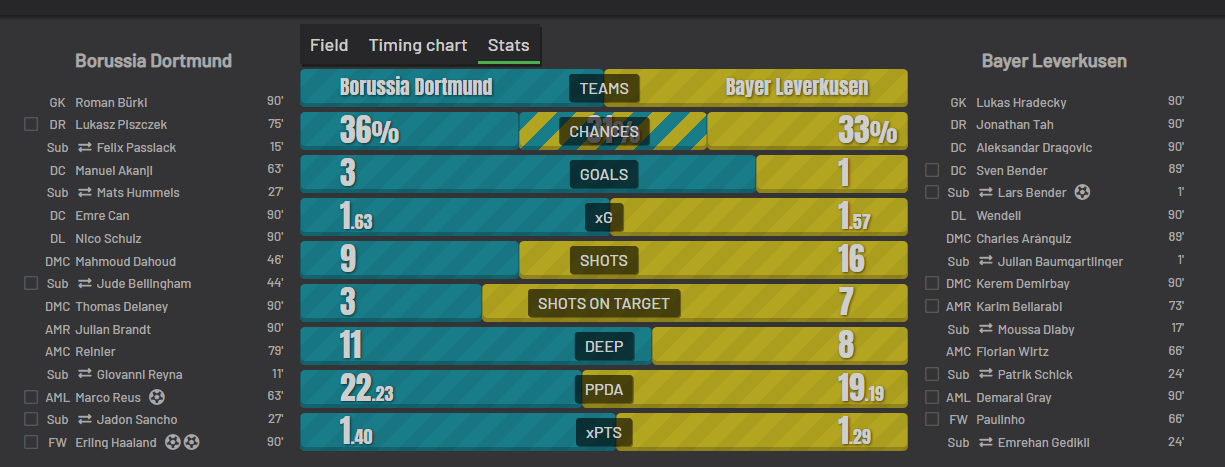

<a id="6.1"></a>
## In Beautiful Soup
As we have once scraped all the match IDs and changed their data types, now it's only a matter of running the loop and obtaining the match statistics.

In [11]:
match_stats = pd.DataFrame()
for i in tqdm(game_ids):
    response = requests.get(f'https://understat.com/match/{i}')
    match_info = re.search("match_info\s+=\s+JSON.parse\('([^']+)", response.text)
    decoded_string = bytes(match_info.groups()[0], 'utf-8').decode('unicode_escape')
    matchObj = json.loads(decoded_string)
    sh = pd.Series(matchObj)
    match_stats = match_stats.append(pd.DataFrame(sh).T)

100%|████████████████████████████████████████████████████████████████████████████████| 380/380 [04:43<00:00,  1.34it/s]


In [12]:
match_stats

,id,fid,h,a,date,league_id,season,h_goals,a_goals,team_h,team_a,h_xg,a_xg,h_w,h_d,h_l,league,h_shot,a_shot,h_shotOnTarget,a_shotOnTarget,h_deep,a_deep,a_ppda,h_ppda
0,14086,1485187,228,83,2020-09-12 11:30:00,1,2020,0,3,Fulham,Arsenal,0.126327,2.16287,0.0037,0.0476,0.9487,EPL,5,13,2,6,0,11,21.9286,32.6923
0,14087,1485186,78,74,2020-09-12 14:00:00,1,2020,1,0,Crystal Palace,Southampton,1.39569,1.26267,0.3916,0.3022,0.3062,EPL,5,9,3,5,1,14,3.6087,17.3333
0,14090,1485188,87,245,2020-09-12 16:30:00,1,2020,4,3,Liverpool,Leeds,3.15412,0.269813,0.9658,0.0296,0.0046,EPL,22,6,6,3,19,2,9.3333,9.9355
0,14091,1485191,81,86,2020-09-12 19:00:00,1,2020,0,2,West Ham,Newcastle United,0.861445,1.65911,0.1506,0.248,0.6014,EPL,15,15,3,2,5,10,24.1818,6.4074
0,14092,1485190,76,75,2020-09-13 13:00:00,1,2020,0,3,West Bromwich Albion,Leicester,0.352997,2.95581,0.007,0.0358,0.9572,EPL,7,13,1,7,6,3,10.5294,19.1053
0,14093,1485189,82,72,2020-09-13 15:30:00,1,2020,0,1,Tottenham,Everton,0.822944,1.26793,0.22,0.2977,0.4823,EPL,9,15,5,4,9,5,16.2632,11.3333
0,14094,1485193,238,229,2020-09-14 17:00:00,1,2020,0,2,Sheffield United,Wolverhampton Wanderers,0.949316,1.61307,0.1683,0.2906,0.5411,EPL,9,11,2,4,10,3,31.3333,8.2333
0,14095,1485192,220,80,2020-09-14 19:15:00,1,2020,1,3,Brighton,Chelsea,1.44281,1.27062,0.3871,0.3153,0.2976,EPL,13,10,3,5,3,6,12.6957,9.3448
0,14096,1485197,72,76,2020-09-19 11:30:00,1,2020,5,2,Everton,West Bromwich Albion,4.16254,0.315347,0.9973,0.0022,0.0005,EPL,17,6,7,4,6,6,41.5000,9.0952
0,14097,1485198,245,228,2020-09-19 14:00:00,1,2020,4,3,Leeds,Fulham,1.45254,1.55503,0.3157,0.3137,0.3706,EPL,10,14,7,6,5,4,9.4231,7.6176


<a id="6.2"></a>
## In Selenium
The same exact process can be applied for Selenium.

**IMPORTANT NOTE: Remember that it's not possible to run Selenium and the chromedriver here on Kaggle which is why this cell's not been run**

In [14]:
match_stats = pd.DataFrame()
for i in tqdm(game_ids) :
    driver = webdriver.Chrome(r'C:\Users\jose\Documents\Data Science\Personal\Soccer\Understat Kaggle\chromedriver')
    # Input the link using get fucntion
    link = f"https://understat.com/match/{i}"
    driver.get(link)
    # select the shot data 
    match_info = driver.execute_script('return match_info;')
    info = pd.Series(match_info)
    match_stats = match_stats.append(pd.DataFrame(info).T)
    # close the driver 
    driver.close()

100%|████████████████████████████████████████████████████████████████████████████████| 380/380 [56:17<00:00,  8.89s/it]


In [15]:
match_stats

,a,a_deep,a_goals,a_ppda,a_shot,a_shotOnTarget,a_xg,date,fid,h,h_d,h_deep,h_goals,h_l,h_ppda,h_shot,h_shotOnTarget,h_w,h_xg,id,league,league_id,season,team_a,team_h
0,83,11,3,21.9286,13,6,2.16287,2020-09-12 11:30:00,1485187,228,0.0476,0,0,0.9487,32.6923,5,2,0.0037,0.126327,14086,EPL,1,2020,Arsenal,Fulham
0,74,14,0,3.6087,9,5,1.26267,2020-09-12 14:00:00,1485186,78,0.3022,1,1,0.3062,17.3333,5,3,0.3916,1.39569,14087,EPL,1,2020,Southampton,Crystal Palace
0,245,2,3,9.3333,6,3,0.269813,2020-09-12 16:30:00,1485188,87,0.0296,19,4,0.0046,9.9355,22,6,0.9658,3.15412,14090,EPL,1,2020,Leeds,Liverpool
0,86,10,2,24.1818,15,2,1.65911,2020-09-12 19:00:00,1485191,81,0.248,5,0,0.6014,6.4074,15,3,0.1506,0.861445,14091,EPL,1,2020,Newcastle United,West Ham
0,75,3,3,10.5294,13,7,2.95581,2020-09-13 13:00:00,1485190,76,0.0358,6,0,0.9572,19.1053,7,1,0.007,0.352997,14092,EPL,1,2020,Leicester,West Bromwich Albion
0,72,5,1,16.2632,15,4,1.26793,2020-09-13 15:30:00,1485189,82,0.2977,9,0,0.4823,11.3333,9,5,0.22,0.822944,14093,EPL,1,2020,Everton,Tottenham
0,229,3,2,31.3333,11,4,1.61307,2020-09-14 17:00:00,1485193,238,0.2906,10,0,0.5411,8.2333,9,2,0.1683,0.949316,14094,EPL,1,2020,Wolverhampton Wanderers,Sheffield United
0,80,6,3,12.6957,10,5,1.27062,2020-09-14 19:15:00,1485192,220,0.3153,3,1,0.2976,9.3448,13,3,0.3871,1.44281,14095,EPL,1,2020,Chelsea,Brighton
0,76,6,2,41.5000,6,4,0.315347,2020-09-19 11:30:00,1485197,72,0.0022,6,5,0.0005,9.0952,17,7,0.9973,4.16254,14096,EPL,1,2020,West Bromwich Albion,Everton
0,228,4,3,9.4231,14,6,1.55503,2020-09-19 14:00:00,1485198,245,0.3137,5,4,0.3706,7.6176,10,7,0.3157,1.45254,14097,EPL,1,2020,Fulham,Leeds


<a id="7."></a>
# References

The idea for this notebook came from these 3 questions asked in Stack Overflow : 

   1. https://stackoverflow.com/questions/54868228/issue-with-scraping-understat-chart-data-using-selenium
   
    
   2. https://stackoverflow.com/questions/67859503/web-scraping-understat-top-players-data
   
    
   3. https://stackoverflow.com/questions/62431388/how-to-get-the-data-from-a-script-tag-on-a-website-using-python
   
    


<a id="8."></a>
# Other notebooks 
Here I add some other notebooks on the subject

   1. https://github.com/ibnass/Liverpool-Evolution-with-Klopp/blob/main/script/scrapping/dev_Jacky/Scrap_Understat.ipynb
   
   
   2. https://github.com/cooperh01/understat_scrape/blob/main/FornalsSDScrap.ipynb
   
   
   3. https://github.com/douglasbc/scraping-understat-dataset/tree/main/scraping
   
   
   4. https://github.com/andrewjoelpeters/understat/blob/main/scrape_rosters.ipynb
   
   